<a href="https://colab.research.google.com/github/Anilabhimanyu/Data-Science/blob/main/Recurrent_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## RNN architecture


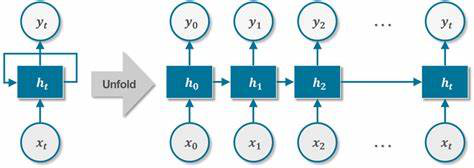

In [220]:
from PIL import Image
Image.open("/content/rnn_architecture.jpeg")

## Importing packages

In [180]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN
from sklearn.metrics import mean_squared_error

# Creating Data

### watermark

In [181]:
!pip install watermark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [182]:
import watermark
 
%load_ext watermark

%watermark -n -v -m -p numpy,scipy,keras,matplotlib,sklearn,pandas



The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.8.10
IPython version      : 7.9.0

numpy     : 1.21.6
scipy     : 1.7.3
keras     : 2.11.0
matplotlib: 3.2.2
sklearn   : 1.0.2
pandas    : 1.3.5

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.10.147+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit



In [183]:
%watermark -n -v -m -p numpy,scipy,keras,matplotlib,sklearn,pandas


Python implementation: CPython
Python version       : 3.8.10
IPython version      : 7.9.0

numpy     : 1.21.6
scipy     : 1.7.3
keras     : 2.11.0
matplotlib: 3.2.2
sklearn   : 1.0.2
pandas    : 1.3.5

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.10.147+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit



## Dataframe

In [184]:
X = np.arange(0, 360)
y = np.sin(X*np.pi/10) ### we can take the any values
z = np.cos(X*np.pi/10)
dataset = pd.DataFrame({"X": X, "y":y,"z":z})
dataset = dataset.set_index("X")
dataset.head()

,y,z
X,,
0,0.000000,1.000000
1,0.309017,0.951057
2,0.587785,0.809017
3,0.809017,0.587785
4,0.951057,0.309017


Text(0.5, 1.0, 'sine wave')

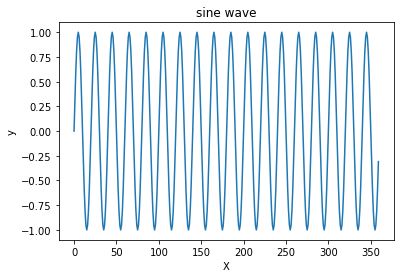

In [189]:
plt.plot(dataset['y'])
plt.xlabel('X')
plt.ylabel('y')
plt.title('sine wave')
# plt.gcf().set_size_inches(11,8)

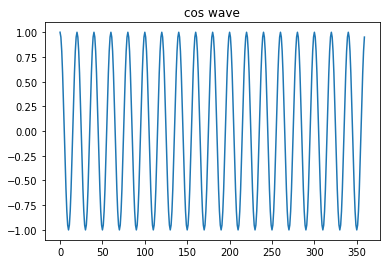

In [187]:
plt.plot(dataset['z'])
plt.title('cos wave')
plt.show()

# sine wave prediction

In [192]:
values_sin = dataset['y'].values.reshape(-1, 1)
X = values_sin[:-1]
y = values_sin[1:]



## for sine wave

In [193]:
n_points = len(values_sin)
train_points = int(2/3*n_points)+1
X_train1, X_test1 = X[:train_points], X[train_points:]
y_train1, y_test1 = X[:train_points], y[train_points:]
print("We have", len(X_train1), "training points and", X_test1.shape[0], "testing points")


We have 241 training points and 118 testing points


In [194]:
X_train1 = X_train1.reshape(X_train1.shape[0], X_train1.shape[1], 1)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], 1)
print(X_train1.shape)
print(X_test1.shape)

(241, 1, 1)
(118, 1, 1)


In [195]:
model = Sequential()
model.add(SimpleRNN(units=10, input_shape=(X_train1.shape[1], X_train1.shape[2])))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_23 (SimpleRNN)   (None, 10)                120       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [196]:
nb_epoch = 100

sin_model=model.fit(X_train, y_train, epochs=nb_epoch)

Epoch 1/100
8/8 [==============================] - 1s 2ms/step - loss: 0.5820
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5355
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4908
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4484
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4088
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.3715
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3373
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 0.3052
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2748
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2486
Epoch 11/100
8/8 [==============================] - 0s 2ms/step - loss: 0.2230
Epoch 12/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2008
Epoch 13/100
8/8 [==============================] - 0s 2ms/st

In [201]:
y_train_pred = model.predict(X_train1)
y_test_pred = model.predict(X_test1)

4/4 [==============================] - 0s 3ms/step


In [203]:
dataset['RNN_sin_train_predict'] = 0
dataset['RNN_sin_test_predict'] = 0
dataset.loc[1:train_points, 'RNN_sin_train_predict'] = y_train_pred
dataset.loc[train_points+1:, 'RNN_sin_test_predict'] = y_test_pred

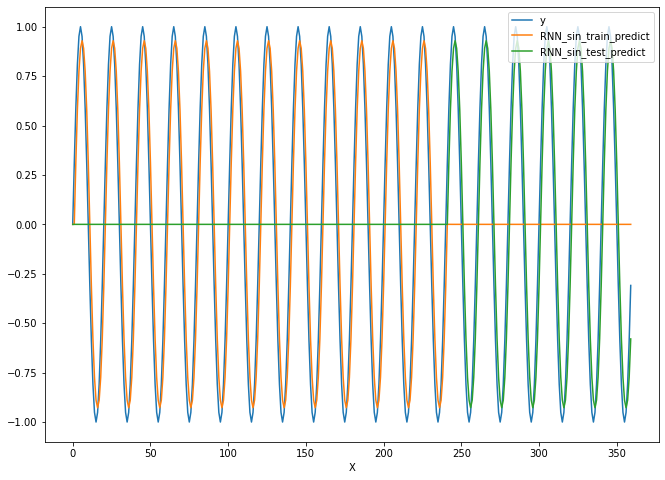

In [204]:
dataset[['y', 'RNN_sin_train_predict', 'RNN_sin_test_predict']].plot()
plt.gcf().set_size_inches(11, 8)

## for cos wave

In [205]:
values_cos=dataset['z'].values.reshape(-1,1)
X2=values_cos[:-1]
y2=values_cos[1:]

In [206]:
n_points = len(values_sin)
train_points = int(2/3*n_points)+1
X_train2, X_test2 = X2[:train_points], X2[train_points:]
y_train2, y_test2 = y2[:train_points], y2[train_points:]
print("We have", len(X_train2), "training points and", X_test2.shape[0], "testing points")


We have 241 training points and 118 testing points


In [207]:
# tf.reset_default_graph()
# keras.backend.clear_session()

X_train2 = X_train2.reshape(X_train2.shape[0], X_train2.shape[1], 1)
X_test2 = X_test2.reshape(X_test2.shape[0], X_test2.shape[1], 1)
print(X_train2.shape)
print(X_test2.shape)

(241, 1, 1)
(118, 1, 1)


# RNN MODEL

In [210]:
nb_epoch = 100

model.fit(X_train2, y_train2, epochs=nb_epoch)

Epoch 1/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0479
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0479
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0478
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 11/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 12/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 13/100
8/8 [==============================] - 0s 3ms/st

In [211]:
y_train_pred = model.predict(X_train2)
y_test_pred = model.predict(X_test2)

4/4 [==============================] - 0s 4ms/step


In [212]:
dataset['RNN_cos_train_predict'] = 0
dataset['RNN_cos_test_predict'] = 0
dataset.loc[1:train_points, 'RNN_cos_train_predict'] = y_train_pred
dataset.loc[train_points+1:, 'RNN_cos_test_predict'] = y_test_pred

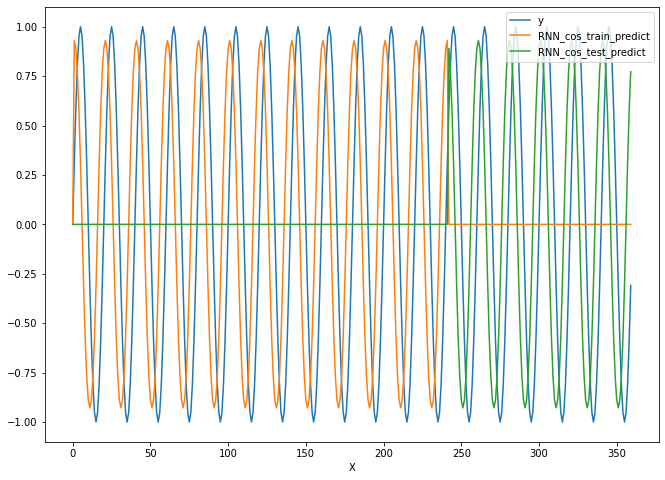

In [213]:
dataset[['y', 'RNN_cos_train_predict', 'RNN_cos_test_predict']].plot()
plt.gcf().set_size_inches(11, 8)

In [ ]:
# Types of RNN:

1. one to many  (music generation)
2. many to one (sentiment analysis i.e, rating)
3. many to many (language translation  i.e, first we pass entire sentence then it starts producing results)

In [ ]:
# Applications
Translation
NER
Auto filling
Text Correction
Speech Recognition
